# Stabilize A Linear System With Linear Quadratic Regulator


## Control Target System
$$
\dot{x}(t) = \begin{bmatrix} 2 & 0 \\ 0 & -5 \end{bmatrix} x(t) + \begin{bmatrix} 1 \\ -2 \end{bmatrix} u(t)
$$

## Case.1 : zero input

$$
\begin{align}
{u}(t) = \begin{bmatrix} 0 \end{bmatrix} \nonumber
\end{align}
$$

t = 0.00 [s], x = [3.00, -5.00]
t = 0.10 [s], x = [3.60, -2.50]
t = 0.20 [s], x = [4.32, -1.25]
t = 0.30 [s], x = [5.18, -0.62]
t = 0.40 [s], x = [6.22, -0.31]
t = 0.50 [s], x = [7.46, -0.16]
t = 0.60 [s], x = [8.96, -0.08]
t = 0.70 [s], x = [10.75, -0.04]
t = 0.80 [s], x = [12.90, -0.02]
t = 0.90 [s], x = [15.48, -0.01]
t = 1.00 [s], x = [18.58, -0.00]
t = 1.10 [s], x = [22.29, -0.00]
t = 1.20 [s], x = [26.75, -0.00]
t = 1.30 [s], x = [32.10, -0.00]
t = 1.40 [s], x = [38.52, -0.00]
t = 1.50 [s], x = [46.22, -0.00]
t = 1.60 [s], x = [55.47, -0.00]
t = 1.70 [s], x = [66.56, -0.00]
t = 1.80 [s], x = [79.87, -0.00]
t = 1.90 [s], x = [95.84, -0.00]
t = 2.00 [s], x = [115.01, -0.00]
t = 2.10 [s], x = [138.02, -0.00]
t = 2.20 [s], x = [165.62, -0.00]
t = 2.30 [s], x = [198.74, -0.00]
t = 2.40 [s], x = [238.49, -0.00]
t = 2.50 [s], x = [286.19, -0.00]
t = 2.60 [s], x = [343.43, -0.00]
t = 2.70 [s], x = [412.11, -0.00]
t = 2.80 [s], x = [494.53, -0.00]
t = 2.90 [s], x = [593.44, -0.00]
t = 3.0

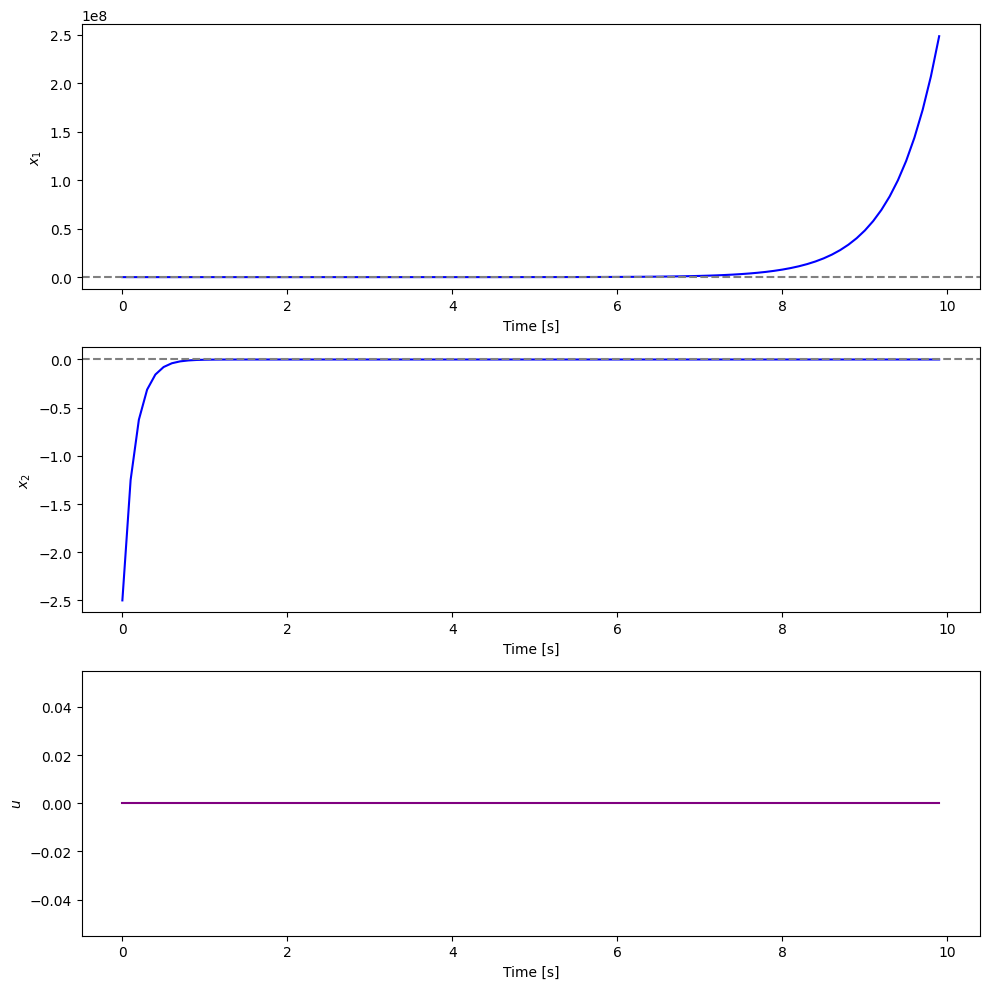

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# define linear system
n = dim_x = 2 # state dimension
m = dim_u = 1 # input dimension

A = np.array([[2, 0],
              [0, -5]])

B = np.array([[1],
              [-2]])

# set simulation parameters
dt = 0.1 # time step
sim_steps = 100 # number of simulation steps

# set initial state
t = 0.0 # [s]
x = np.array([[3.0],
              [-5.0]])

# prepare storage
x_log = np.zeros((dim_x, sim_steps))
u_log = np.zeros((dim_u, sim_steps))

# simulation loop
for i in range(sim_steps):

    # announce current state
    print(f't = {t:.2f} [s], x = [{x[0, 0]:.2f}, {x[1, 0]:.2f}]')

    ##### calculate control input #####
    u = np.array([[0.0]]) # zero input
    ###################################

    # update state
    x_dot = A @ x + B @ u
    x = x + x_dot * dt

    # update time
    t = t + dt

    # store data
    x_log[:, i] = x.flatten()
    u_log[:, i] = u.flatten()

# plot results
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
time = np.arange(0, sim_steps * dt, dt)

ax[0].plot(time, x_log[0, :], label='x1', color="blue")
ax[0].axhline(y=0.0, linestyle='dashed', color='gray', label='0')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel(r'$x_1$')

ax[1].plot(time, x_log[1, :], label='x2', color="blue")
ax[1].axhline(y=0.0, linestyle='dashed', color='gray', label='0')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel(r'$x_2$')

ax[2].plot(time, u_log[0, :], label='u', color="purple")
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel(r'$u$')

plt.tight_layout()
plt.show()

## Case.2 : Linear Quadratic Regulator

$$
\begin{align}
{u}(t) &= - f \cdot x(t) \nonumber\\ 
       &= - \begin{bmatrix} 4.43 & -0.08\end{bmatrix} x(t) \nonumber
\end{align}
$$

In [32]:
from sympy import symbols, Eq, solve

# define symbols
p1, p2, p3 = symbols('p1 p2 p3')

# define equations
eq1 = Eq(-p1**2 + 4*p1 + 4*p1*p2 - 4*p2**2 + 1, 0)
eq2 = Eq(2*p2**2 - 3*p2 - p1*p2 + 2*p1*p3 - 4*p2*p3, 0)
eq3 = Eq(-p2**2 + 4*p2*p3 - 10*p3 - 4*p3**2 + 1, 0)

# solve equations
solutions = solve([eq1, eq2, eq3], [p1, p2, p3])

# output solutions
print("solutions : ")
for idx, s in enumerate(solutions):
    print(f"### sol. {idx}")
    for j in range(len(s)):
        print(s[j].evalf())
print("###"*3)


solutions : 
### sol. 0
0.790090716185432
1.41489373711061
-0.333070844337325
### sol. 1
-0.238962893661010
-0.0144238134144138
0.0957588124024186
### sol. 2
4.67613366903330
0.118577328113591
0.0993577861808820
### sol. 3
-0.247669654823031
-0.172108476299586
-2.76000493791945
#########


t = 0.00 [s], x = [3.00, -5.00]
t = 0.10 [s], x = [2.23, 0.24]
t = 0.20 [s], x = [1.69, 2.09]
t = 0.30 [s], x = [1.30, 2.51]
t = 0.40 [s], x = [1.00, 2.36]
t = 0.50 [s], x = [0.78, 2.03]
t = 0.60 [s], x = [0.60, 1.67]
t = 0.70 [s], x = [0.47, 1.34]
t = 0.80 [s], x = [0.37, 1.07]
t = 0.90 [s], x = [0.29, 0.84]
t = 1.00 [s], x = [0.22, 0.66]
t = 1.10 [s], x = [0.17, 0.52]
t = 1.20 [s], x = [0.14, 0.41]
t = 1.30 [s], x = [0.11, 0.32]
t = 1.40 [s], x = [0.08, 0.25]
t = 1.50 [s], x = [0.06, 0.19]
t = 1.60 [s], x = [0.05, 0.15]
t = 1.70 [s], x = [0.04, 0.12]
t = 1.80 [s], x = [0.03, 0.09]
t = 1.90 [s], x = [0.02, 0.07]
t = 2.00 [s], x = [0.02, 0.06]
t = 2.10 [s], x = [0.01, 0.04]
t = 2.20 [s], x = [0.01, 0.03]
t = 2.30 [s], x = [0.01, 0.03]
t = 2.40 [s], x = [0.01, 0.02]
t = 2.50 [s], x = [0.01, 0.02]
t = 2.60 [s], x = [0.00, 0.01]
t = 2.70 [s], x = [0.00, 0.01]
t = 2.80 [s], x = [0.00, 0.01]
t = 2.90 [s], x = [0.00, 0.01]
t = 3.00 [s], x = [0.00, 0.00]
t = 3.10 [s], x = [0.00, 0.00]
t = 3.2

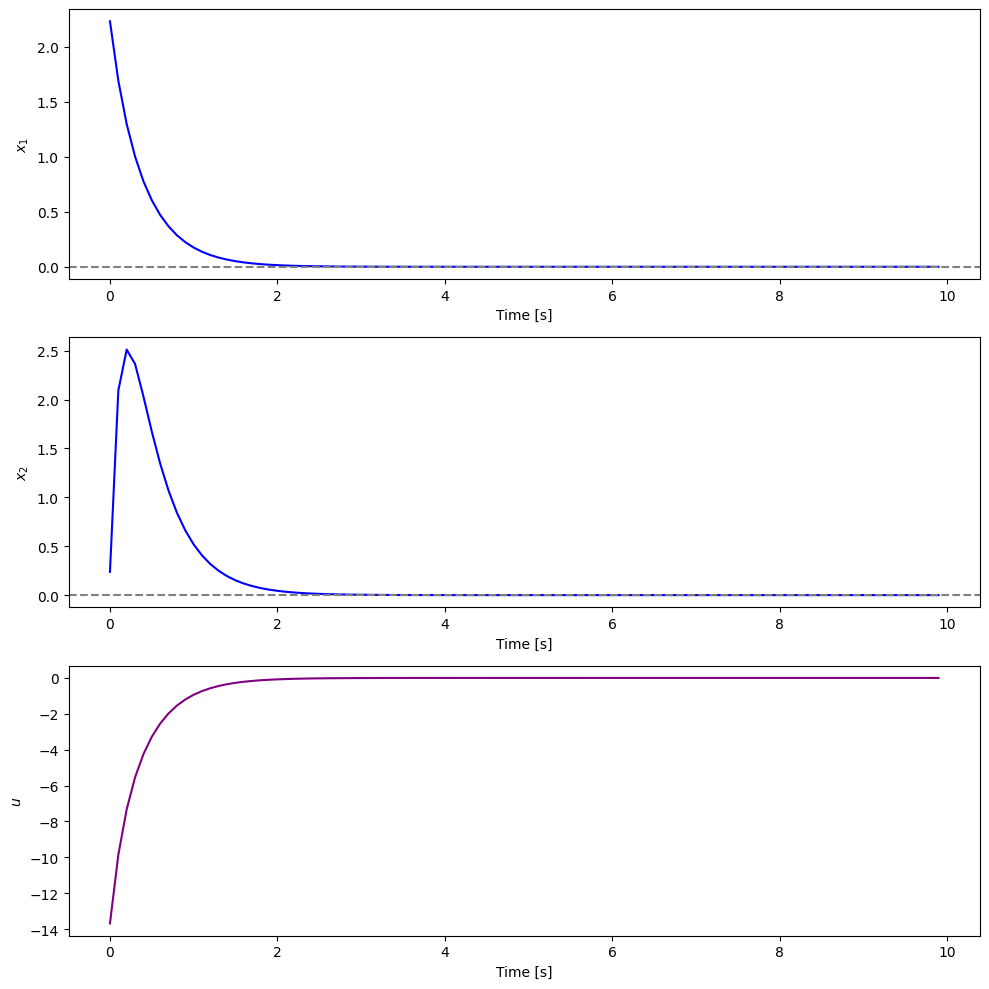

In [28]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# define linear system
n = dim_x = 2 # state dimension
m = dim_u = 1 # input dimension

A = np.array([[2, 0],
              [0, -5]])

B = np.array([[1],
              [-2]])

# set simulation parameters
dt = 0.1 # time step
sim_steps = 100 # number of simulation steps

# set initial state
t = 0.0 # [s]
x = np.array([[3.0],
              [-5.0]])

# prepare storage
x_log = np.zeros((dim_x, sim_steps))
u_log = np.zeros((dim_u, sim_steps))

# simulation loop
for i in range(sim_steps):

    # announce current state
    print(f't = {t:.2f} [s], x = [{x[0, 0]:.2f}, {x[1, 0]:.2f}]')

    ##### calculate control input #####
    f = np.array([[4.43, -0.08]]) # feedback gain martrix
    u = - f @ x # state feedback control input
    ###################################

    # update state
    x_dot = A @ x + B @ u
    x = x + x_dot * dt

    # update time
    t = t + dt

    # store data
    x_log[:, i] = x.flatten()
    u_log[:, i] = u.flatten()

# plot results
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
time = np.arange(0, sim_steps * dt, dt)

ax[0].plot(time, x_log[0, :], label='x1', color="blue")
ax[0].axhline(y=0.0, linestyle='dashed', color='gray', label='0')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel(r'$x_1$')

ax[1].plot(time, x_log[1, :], label='x2', color="blue")
ax[1].axhline(y=0.0, linestyle='dashed', color='gray', label='0')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel(r'$x_2$')

ax[2].plot(time, u_log[0, :], label='u', color="purple")
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel(r'$u$')

plt.tight_layout()
plt.show()